In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Function to load data
def load_data(filename):
    return pd.read_csv(filename)

# Function to compute CDF
def compute_cdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

# Load data for each mode
timestamp = "20240823_182901"
modes = ["RA2C", "RA2C_fed", "A2C", "recurrent", "fixedprob", "vanilla"]
dataframes = {}

for mode in modes:
    filename = f"test_log_{mode}_{timestamp}.csv"
    dataframes[mode] = load_data(filename)
    
# Set the style for the plot
sns.set_theme(style="whitegrid")
sns.set_palette("husl")
colors = sns.color_palette("husl", len(modes))

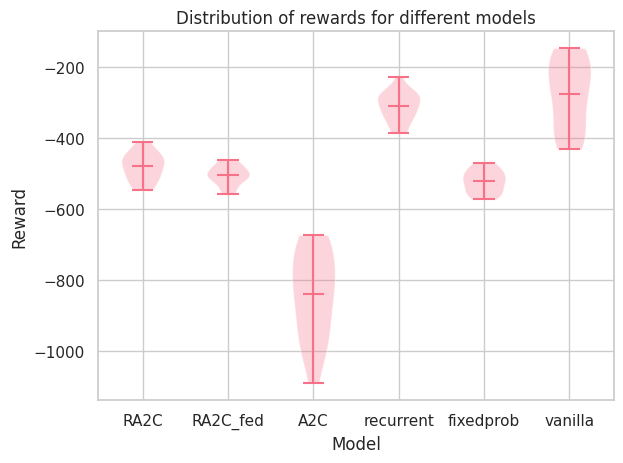

In [20]:
fig, ax = plt.subplots()
# Draw the violinplot only when the epoch is 299.
violin = ax.violinplot([dataframes[mode]["reward"][dataframes[mode]["epoch"]==299] for mode in modes],
                       showmeans=True)
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Model")
plt.ylabel("Reward")
plt.title("Distribution of rewards for different models")
plt.xticks([1, 2, 3, 4, 5, 6], modes)
plt.tight_layout()
plt.show()

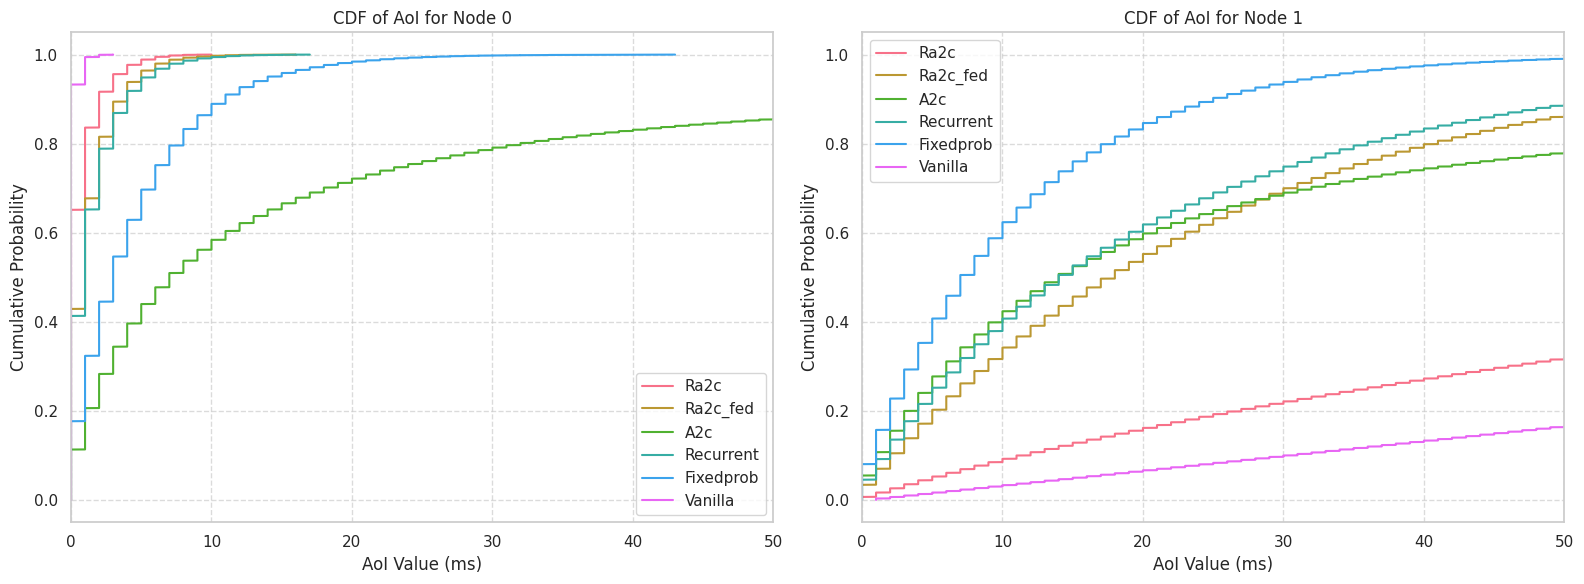

In [21]:
# Function to compute CDF
def compute_cdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

# Create CDF plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, mode in enumerate(modes):
    df = dataframes[mode]
    
    # CDF for aoi_0
    x0, y0 = compute_cdf(pd.concat([df['aoi_0'], df['aoi_7']]))
    ax1.plot(x0*300, y0, label=mode.capitalize(), color=colors[i])
    
    # CDF for aoi_1
    x1, y1 = compute_cdf(pd.concat([df[f'aoi_{i}'] for i in range(1, 7)]))
    ax2.plot(x1*300, y1, label=mode.capitalize(), color=colors[i])

# Customize the first subplot (aoi_0)
ax1.set_xlabel('AoI Value (ms)')
ax1.set_ylabel('Cumulative Probability')
ax1.set_title('CDF of AoI for Node 0')
ax1.legend()
ax1.set_xlim([0, 50])
ax1.grid(True, linestyle='--', alpha=0.7)

# Customize the second subplot (aoi_1)
ax2.set_xlabel('AoI Value (ms)')
ax2.set_ylabel('Cumulative Probability')
ax2.set_title('CDF of AoI for Node 1')
ax2.legend()
ax2.set_xlim([0, 50])
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

In [22]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
action_columns = ['action_0', 'action_1', 'action_2', 'action_3', 'action_4', 'action_5', 'action_6', 'action_7']

for i, mode in enumerate(modes):
    df = dataframes[mode]
    print(f"Mode: {mode}")
    print(f"Avg. number of tx actions of all agents: {df[action_columns].to_numpy().sum()/10}")

Mode: RA2C
Avg. number of tx actions of all agents: 2574.9
Mode: RA2C_fed
Avg. number of tx actions of all agents: 2285.7
Mode: A2C
Avg. number of tx actions of all agents: 2349.8
Mode: recurrent
Avg. number of tx actions of all agents: 1942.7
Mode: fixedprob
Avg. number of tx actions of all agents: 2049.3
Mode: vanilla
Avg. number of tx actions of all agents: 2794.2


In [23]:
# Print action distributions per agent 0 to 7 for each mode
for mode in modes:
    df = dataframes[mode]
    print(f"")
    print(f"Mode: {mode}")
    for i in range(8):
        print(f"Agent {i}: {df[f'action_{i}'].mean():.3f}", end=" ")


Mode: RA2C
Agent 0: 0.508 Agent 1: 0.490 Agent 2: 0.260 Agent 3: 0.174 Agent 4: 0.096 Agent 5: 0.996 Agent 6: 0.910 Agent 7: 0.857 
Mode: RA2C_fed
Agent 0: 0.479 Agent 1: 0.475 Agent 2: 0.473 Agent 3: 0.466 Agent 4: 0.480 Agent 5: 0.479 Agent 6: 0.483 Agent 7: 0.475 
Mode: A2C
Agent 0: 0.094 Agent 1: 0.691 Agent 2: 0.743 Agent 3: 0.355 Agent 4: 0.889 Agent 5: 0.827 Agent 6: 0.148 Agent 7: 0.169 
Mode: recurrent
Agent 0: 0.365 Agent 1: 0.401 Agent 2: 0.282 Agent 3: 0.559 Agent 4: 0.350 Agent 5: 0.370 Agent 6: 0.409 Agent 7: 0.502 
Mode: fixedprob
Agent 0: 0.194 Agent 1: 0.504 Agent 2: 0.503 Agent 3: 0.503 Agent 4: 0.497 Agent 5: 0.502 Agent 6: 0.505 Agent 7: 0.207 
Mode: vanilla
Agent 0: 0.997 Agent 1: 0.368 Agent 2: 0.744 Agent 3: 0.277 Agent 4: 0.273 Agent 5: 0.712 Agent 6: 0.288 Agent 7: 1.000 